<a href="https://colab.research.google.com/github/rawatPariz/2461850_parizRawat/blob/main/2461850_Pariz_Rawat(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Project – Simple Colab Style (Airbnb Dataset)

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
df_reg_raw = pd.read_csv("/content/drive/My Drive/concept and technology of ai/Airbnb_Open_Data.csv")
print("Dataset shape:", df_reg_raw.shape)
df_reg_raw.head()


Dataset shape: (102599, 26)


/tmp/ipython-input-3065619932.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reg_raw = pd.read_csv("/content/drive/My Drive/concept and technology of ai/Airbnb_Open_Data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [31]:
df_reg_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [32]:

df_reg_raw.isna().sum().sort_values(ascending=False).head(15)



,0
license,102597
house_rules,52131
last review,15893
reviews per month,15879
country,532
availability 365,448
minimum nights,409
host name,406
review rate number,326
calculated host listings count,319


In [33]:
# Clean price column (convert from $ to numeric)
df_reg_raw['price'] = df_reg_raw['price'].astype(str).str.replace('$', '', regex=False)
df_reg_raw['price'] = df_reg_raw['price'].str.replace(',', '', regex=False)
df_reg_raw['price'] = pd.to_numeric(df_reg_raw['price'], errors='coerce')


In [34]:
df_reg_raw["price"].describe()


,price
count,102352.000000
mean,625.293536
std,331.671614
min,50.000000
25%,340.000000
50%,624.000000
75%,913.000000
max,1200.000000


In [35]:
df_reg = df_reg_raw.copy()

# drop unnecessary or highly-missing columns
df_reg = df_reg.drop([
    "id",
    "NAME",
    "host id",
    "host name",
    "last review",
    "license",
    "house_rules",
    "country"
    "service fee"
], axis=1, errors="ignore")

# convert price to numeric (important)
df_reg["price"] = df_reg["price"].astype(str).str.replace("$", "", regex=False)
df_reg["price"] = df_reg["price"].str.replace(",", "", regex=False)
df_reg["price"] = pd.to_numeric(df_reg["price"], errors="coerce")

# fill missing numeric values
df_reg["reviews per month"] = df_reg["reviews per month"].fillna(
    df_reg["reviews per month"].median()
)

df_reg["availability 365"] = df_reg["availability 365"].fillna(
    df_reg["availability 365"].median()
)

df_reg["minimum nights"] = df_reg["minimum nights"].fillna(
    df_reg["minimum nights"].median()
)

df_reg["review rate number"] = df_reg["review rate number"].fillna(
    df_reg["review rate number"].median()
)

df_reg["calculated host listings count"] = df_reg["calculated host listings count"].fillna(
    df_reg["calculated host listings count"].median()
)

df_reg["service fee"] = df_reg["service fee"].astype(str).str.replace("$", "", regex=False)
df_reg["service fee"] = df_reg["service fee"].str.replace(",", "", regex=False)
df_reg["service fee"] = pd.to_numeric(df_reg["service fee"], errors="coerce")
df_reg["service fee"] = df_reg["service fee"].fillna(df_reg["service fee"].median())

# drop any remaining rows with missing target
df_reg = df_reg.dropna(subset=["price"])

print("Missing values after cleaning:")
df_reg.isna().sum().sort_values(ascending=False).head(10)


Missing values after cleaning:


,0
country,527
host_identity_verified,285
Construction year,210
number of reviews,183
country code,126
instant_bookable,100
cancellation_policy,71
neighbourhood group,28
neighbourhood,15
lat,8


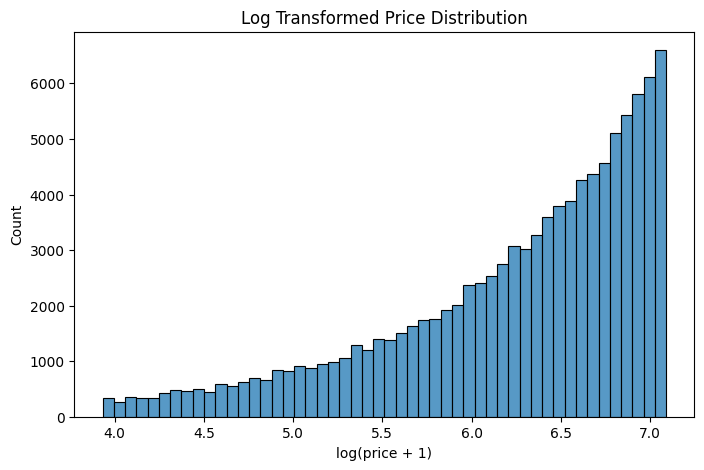

In [36]:

# Price distribution

plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df_reg["price"]), bins=50)
plt.title("Log Transformed Price Distribution")
plt.xlabel("log(price + 1)")
plt.show()


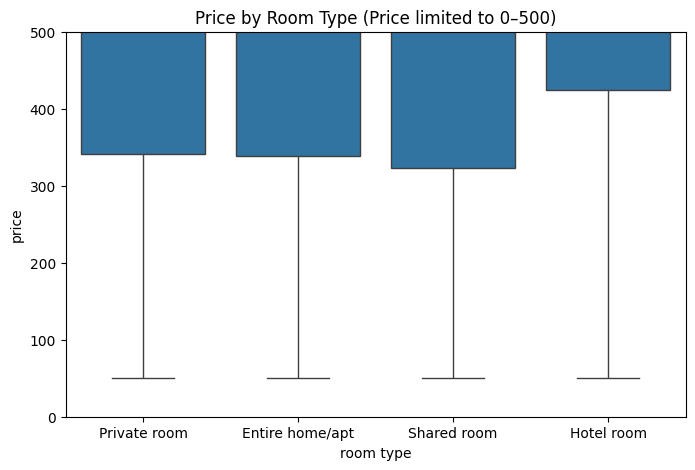

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(x="room type", y="price", data=df_reg)
plt.ylim(0, 500)
plt.title("Price by Room Type (Price limited to 0–500)")
plt.show()


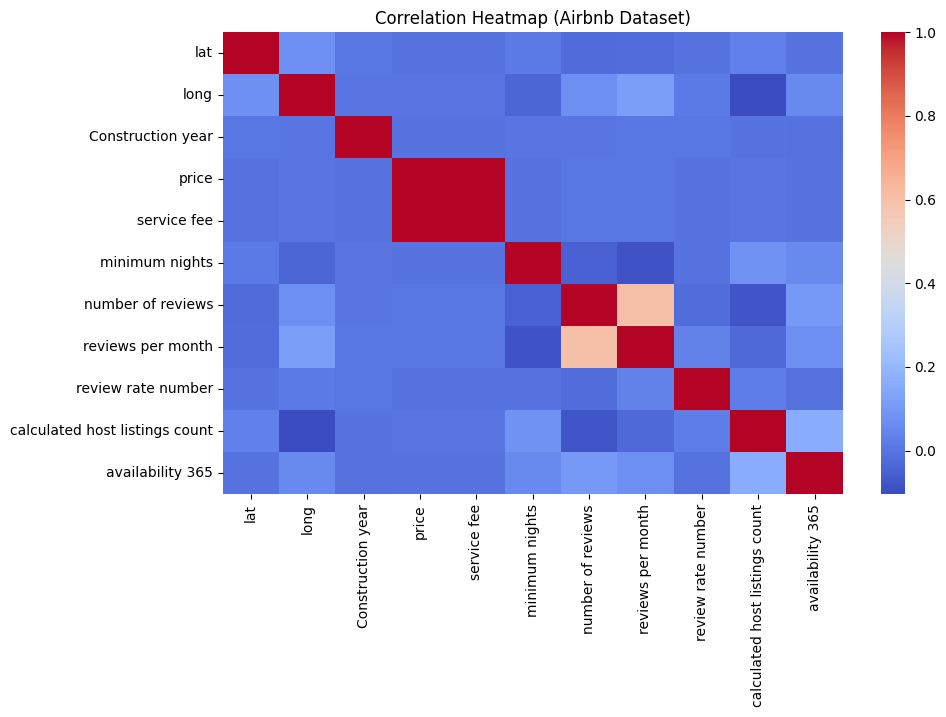

In [38]:

plt.figure(figsize=(10,6))
sns.heatmap(df_reg.corr(numeric_only=True), cmap="coolwarm")
plt.title("Correlation Heatmap (Airbnb Dataset)")
plt.show()


In [39]:
X = df_reg.drop("price", axis=1)
y = df_reg["price"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (102352, 18)
y shape: (102352,)


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (81881, 18) Test: (20471, 18)


In [41]:
# FINAL CLEAN (must be right before modeling)
df_reg = df_reg.dropna()
print("df_reg shape after dropna:", df_reg.shape)
print("Total missing in df_reg:", df_reg.isna().sum().sum())


df_reg shape after dropna: (101098, 19)
Total missing in df_reg: 0


In [42]:
df_reg = df_reg.drop(columns=["service fee"], errors="ignore")


In [43]:
print(X.columns)


Index(['host_identity_verified', 'neighbourhood group', 'neighbourhood', 'lat',
       'long', 'country', 'country code', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'service fee',
       'minimum nights', 'number of reviews', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')


In [44]:
X = df_reg.drop("price", axis=1)
y = df_reg["price"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (101098, 17)
y shape: (101098,)


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (80878, 17) Test: (20220, 17)


In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.select_dtypes(exclude=["object"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)


In [47]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

lr_model.fit(X_train, y_train)
pred_lr = lr_model.predict(X_test)

print("Linear Regression MAE:", mean_absolute_error(y_test, pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, pred_lr)))
print("Linear Regression R2:", r2_score(y_test, pred_lr))


Linear Regression MAE: 287.4348972624855
Linear Regression RMSE: 332.4124498773496
Linear Regression R2: -0.0009221499152334278


In [48]:
from sklearn.tree import DecisionTreeRegressor

dt_reg_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeRegressor(random_state=42, max_depth=10))
])

dt_reg_model.fit(X_train, y_train)
pred_dt = dt_reg_model.predict(X_test)

print("Decision Tree MAE:", mean_absolute_error(y_test, pred_dt))
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, pred_dt)))
print("Decision Tree R2:", r2_score(y_test, pred_dt))


Decision Tree MAE: 286.6802509726446
Decision Tree RMSE: 333.74821241336144
Decision Tree R2: -0.008982501393863584


In [49]:
from sklearn.neural_network import MLPRegressor

mlp_reg_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", MLPRegressor(hidden_layer_sizes=(64,32), max_iter=50, random_state=42))
])

mlp_reg_model.fit(X_train, y_train)
pred_mlp = mlp_reg_model.predict(X_test)

print("MLPRegressor MAE:", mean_absolute_error(y_test, pred_mlp))
print("MLPRegressor RMSE:", np.sqrt(mean_squared_error(y_test, pred_mlp)))
print("MLPRegressor R2:", r2_score(y_test, pred_mlp))


MLPRegressor MAE: 287.4606921825012
MLPRegressor RMSE: 332.8462321342745
MLPRegressor R2: -0.0035361649007998874


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [50]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

fs_reg_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("select", SelectKBest(score_func=f_regression, k=10)),  # safer value
    ("model", LinearRegression())
])

fs_reg_model.fit(X_train, y_train)
pred_fs = fs_reg_model.predict(X_test)

print("Feature Selected Linear Regression MAE:", mean_absolute_error(y_test, pred_fs))
print("Feature Selected Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, pred_fs)))
print("Feature Selected Linear Regression R2:", r2_score(y_test, pred_fs))


Feature Selected Linear Regression MAE: 287.57415804310125
Feature Selected Linear Regression RMSE: 332.36539587827156
Feature Selected Linear Regression R2: -0.0006388027870083413


In [52]:
'pred_dt_tuned' in globals(), 'pred_dt_tuned' in globals()


(False, False)

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    "model__max_depth": [5, 10, 15],
    "model__min_samples_split": [2, 10, 50],
    "model__min_samples_leaf": [1, 5, 10]
}

grid_dt_reg = GridSearchCV(dt_reg_model, param_grid_dt, cv=3, scoring="r2", n_jobs=-1)
grid_dt_reg.fit(X_train, y_train)

best_dt_reg = grid_dt_reg.best_estimator_
pred_dt_tuned = best_dt_reg.predict(X_test)


In [54]:
def reg_row(name, y_true, y_pred):
    return {
        "Model": name,
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }

results_reg = pd.DataFrame([
    reg_row("Linear Regression", y_test, pred_lr),
    reg_row("Decision Tree", y_test, pred_dt),
    reg_row("MLPRegressor (Neural Net)", y_test, pred_mlp),
    reg_row("Decision Tree (Tuned)", y_test, pred_dt_tuned),
    reg_row("Linear Regression (Feature Selected)", y_test, pred_fs)
])

results_reg


,Model,MAE,RMSE,R2
0,Linear Regression,287.434897,332.412450,-0.000922
1,Decision Tree,286.680251,333.748212,-0.008983
2,MLPRegressor (Neural Net),287.460692,332.846232,-0.003536
3,Decision Tree (Tuned),287.479532,332.408402,-0.000898
4,Linear Regression (Feature Selected),287.574158,332.365396,-0.000639
